In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, StandardScaler
import seaborn as sns

In [58]:
df = pd.read_csv('datasets/FyntraCustomerData.csv')
df.head()

,Email,Address,Avatar,Avg_Session_Length,Time_on_App,Time_on_Website,Length_of_Membership,Yearly_Amount_Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\r\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\r\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\r\nCobbborough,...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\r\nPort Jason, OH 22070-...",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\r\nPort Jacobville, PR...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [59]:
df.describe()

,Avg_Session_Length,Time_on_App,Time_on_Website,Length_of_Membership,Yearly_Amount_Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


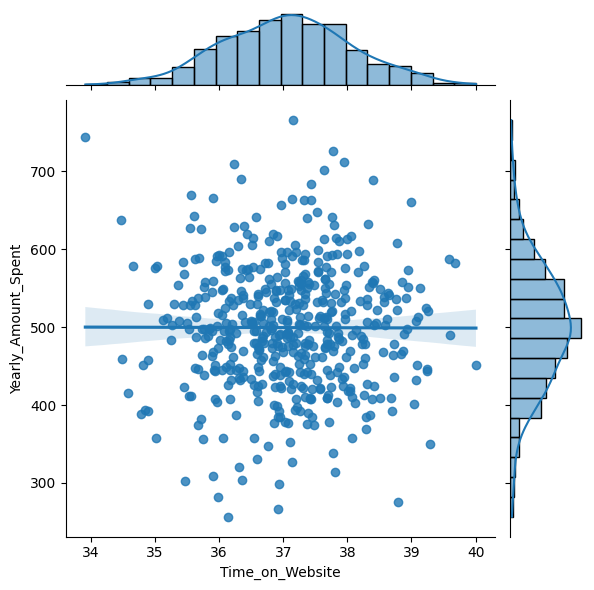

In [60]:
sns.jointplot(x = "Time_on_Website", y = "Yearly_Amount_Spent", data = df, kind='reg') 

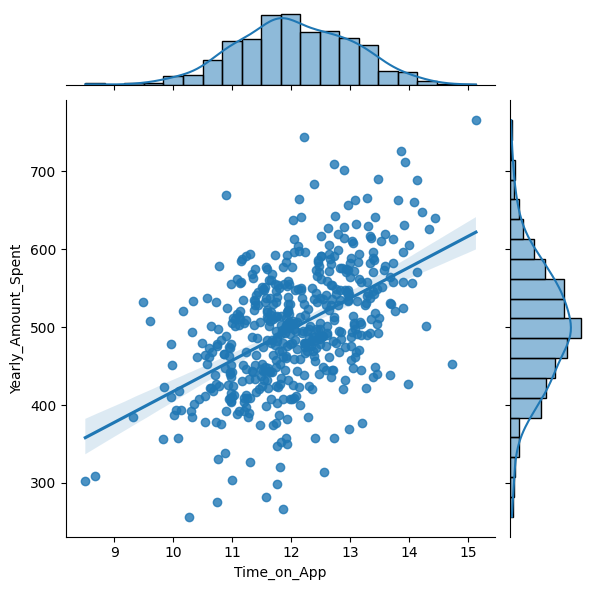

In [61]:
sns.jointplot(x = "Time_on_App", y = "Yearly_Amount_Spent", data = df, kind='reg') 

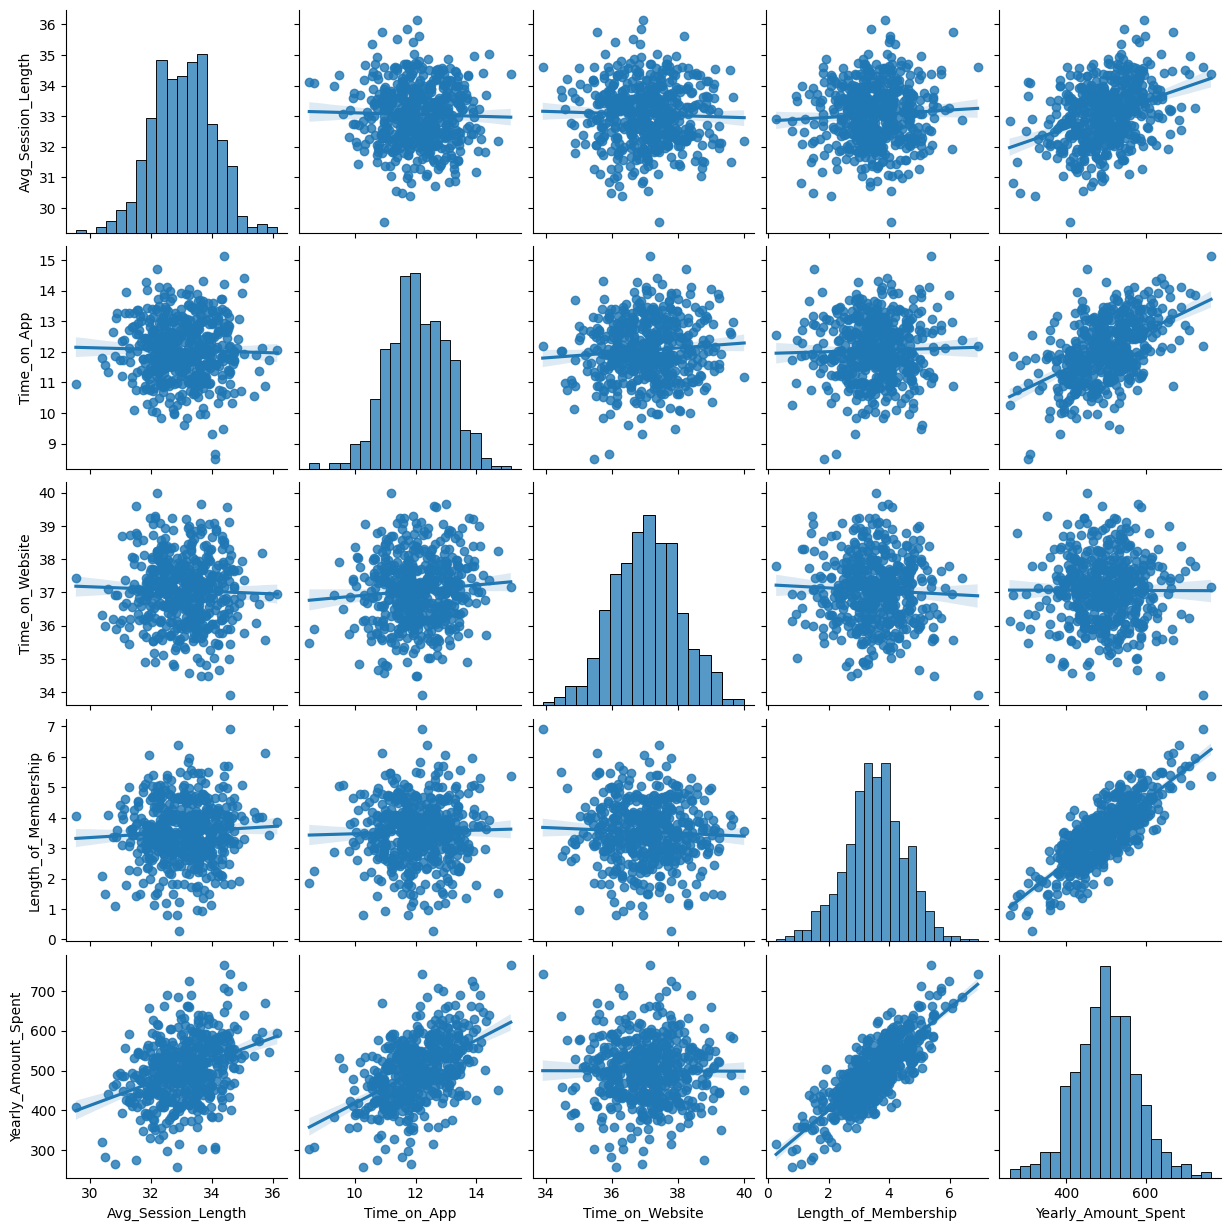

In [62]:
sns.pairplot(df, kind='reg')

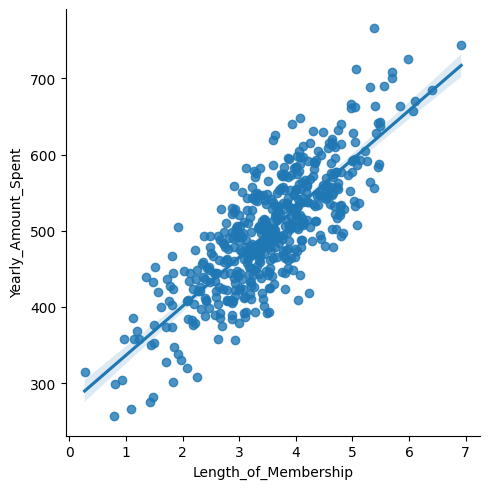

In [63]:
sns.lmplot(x ='Length_of_Membership', y ='Yearly_Amount_Spent', data = df) 

ML Start

--> y = b<sub>0</sub> + b<sub>1</sub>X<sub>1</sub> --> Simple Linear Regression

--> y = b<sub>0</sub> + b<sub>1</sub>X<sub>1</sub>  + b<sub>2</sub>X<sub>2</sub> + .... + b<sub>n</sub>X<sub>n</sub> --> Multiple Linear Regression

--> y = b<sub>0</sub> + b<sub>1</sub>X<sub>1</sub> + b<sub>2</sub>X<sub>1</sub><sup>2</sup> + .... + b<sub>n</sub>X<sub>1</sub><sup>n</sup> --> Polynomial Linear Regression

Minimize --> Ordinary Leat Squares/Sum of Squared Errors = Σ(y<sub>i</sub> - ŷ<sub>i</sub>)<sup>2</sup> (actual - predicted)

In [64]:
# independent and Dependent Variables

X = df.iloc[:, 3:-1].values
y = df.iloc[:, -1].values

In [65]:
# Train Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=85)

In [66]:
# Train the Model on Traing Set (Multiple Linear Regression - More than one independant variable)
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

LinearRegression()

In [67]:
# Predict output on Test Set
y_pred = linear_regressor.predict(X_test)

In [68]:
# Calculate Metrics

from sklearn import metrics
import math

print("MSE: ", metrics.mean_squared_error(y_test, y_pred))
print("RMSE: ", math.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("MAE: ", metrics.mean_absolute_error(y_test, y_pred))

print("R Squared: ", metrics.r2_score(y_test, y_pred)) #Model Performance

MSE:  95.03600581432381
RMSE:  9.748641229131566
MAE:  7.637028243772222
R Squared:  0.9809686791264653


In [69]:
print("b0 : ", linear_regressor.intercept_, linear_regressor.coef_)

cols = df.iloc[:, 3:-1].columns
cdf = pd.DataFrame(data=linear_regressor.coef_, index=cols, columns=['Coeff'], dtype=float, copy=False)
print("\n b1, b2, .., bn \n", cdf)

b0 :  -1071.220547193681 [25.94725163 39.06682064  0.68253009 61.33469418]

 b1, b2, .., bn 
                           Coeff
Avg_Session_Length    25.947252
Time_on_App           39.066821
Time_on_Website        0.682530
Length_of_Membership  61.334694


Statistical Significance

In [70]:
import statsmodels.api as sm

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     7766.
Date:                Fri, 17 May 2024   Prob (F-statistic):               0.00
Time:                        22:20:29   Log-Likelihood:                -1856.9
No. Observations:                 500   AIC:                             3724.
Df Residuals:                     495   BIC:                             3745.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1051.5943     22.993    -45.736      0.0

Feature Scaling

In [73]:
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_train

array([[-0.26959818,  0.7296103 , -0.05513263,  0.31874648],
       [-0.89359984, -0.68986506,  1.12272788,  1.26291198],
       [ 0.60293118,  0.8802377 ,  0.24951773, -0.29520374],
       ...,
       [ 0.94434021,  0.82632719, -1.05053891, -0.04002359],
       [-0.23995098,  0.28027722,  0.96273536, -0.21652036],
       [ 0.91246331, -2.74462785, -0.17291188, -0.65148093]])

In [74]:
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train.reshape(-1, 1))
y_train

array([[ 0.4191691 ],
       [ 0.40216057],
       [ 0.51323098],
       [-0.69957134],
       [-1.39476411],
       [-0.16145418],
       [ 0.99241048],
       [ 1.45484281],
       [ 0.29426034],
       [ 0.47047661],
       [ 0.14873658],
       [-0.94324993],
       [ 2.25951221],
       [-0.21672513],
       [-0.48833591],
       [ 0.11887482],
       [-1.26382467],
       [-0.71488104],
       [-0.65987814],
       [-1.56291098],
       [ 0.01701096],
       [ 0.71693945],
       [ 0.260328  ],
       [ 0.12672715],
       [ 0.35039418],
       [-0.27706036],
       [ 0.03037258],
       [ 1.43027249],
       [ 0.58845365],
       [ 1.71775978],
       [-0.95405599],
       [-1.31687304],
       [-0.27142758],
       [ 1.01422441],
       [ 0.93084133],
       [ 0.80374477],
       [-1.5442751 ],
       [ 0.74858074],
       [ 0.86085406],
       [ 0.60552356],
       [-0.45370292],
       [-0.46634107],
       [-0.91134622],
       [-0.60516827],
       [ 1.80931377],
       [ 0

In [75]:
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

LinearRegression()

In [76]:
X_test = sc_x.transform(X_test)
X_test

array([[ 7.93666214e-01, -5.54156410e-01, -1.15980263e+00,
        -5.08777389e-01],
       [ 1.49151825e+00, -3.01837855e-01,  9.02846940e-01,
         2.52325477e-01],
       [ 1.03474522e+00, -3.54662778e+00, -1.64030909e+00,
        -1.66815652e+00],
       [ 2.30259983e-01,  2.94318388e-01,  1.69533489e+00,
         3.11118205e-01],
       [ 3.95895343e-01,  9.95964755e-01, -1.25296326e+00,
        -5.93737998e-01],
       [-3.16224534e-01, -1.12098817e+00,  5.65902990e-01,
         4.84431146e-01],
       [-1.26791658e+00, -8.48878146e-01, -1.43065289e+00,
         2.24295137e-01],
       [ 9.78641816e-01,  3.89554845e-01, -2.06919204e+00,
         5.20259530e-01],
       [-1.77839565e+00, -3.94000454e-01,  1.64763141e+00,
         6.48446920e-02],
       [ 1.39697026e+00, -1.63552390e-01,  6.87528462e-01,
         8.11492257e-01],
       [-6.77365310e-01, -4.69330261e-01,  1.03481209e+00,
        -5.54640123e-01],
       [ 5.35195616e-01,  1.31150520e-01,  1.13461646e-01,
      

In [77]:
y_pred = linear_regressor.predict(X_test)

In [78]:
sc_y.inverse_transform(y_pred)

array([[466.95574931],
       [543.54378046],
       [282.97655603],
       [538.74526657],
       [512.39817863],
       [478.97647861],
       [447.68145376],
       [572.20762017],
       [444.62148369],
       [581.16214455],
       [431.07300644],
       [481.53084886],
       [507.50489935],
       [554.09682399],
       [562.53344576],
       [610.12942586],
       [483.76356924],
       [505.5238708 ],
       [485.59974118],
       [313.76593584],
       [471.37136534],
       [493.14737697],
       [472.96904139],
       [402.99888116],
       [488.39693089],
       [513.74938421],
       [450.68033215],
       [380.02468439],
       [423.23981584],
       [576.21013175],
       [370.35257426],
       [486.82807267],
       [500.50903791],
       [508.34706489],
       [536.34913031],
       [408.25143767],
       [540.34823344],
       [503.75134519],
       [416.73246792],
       [387.75928507],
       [520.73325444],
       [445.9523117 ],
       [498.91460033],
       [552

In [79]:
print("R Squared: ", metrics.r2_score(y_test, sc_y.inverse_transform(y_pred))) #Model Performance

R Squared:  0.9809686791264652


In [93]:
df.iloc[:, 3:-1].columns.values.shape

(4,)

In [95]:
print("b0 : ", linear_regressor.intercept_, linear_regressor.coef_)

b0 :  [-6.32223085e-15] [[0.31701602 0.48496114 0.00832327 0.76566874]]
